# Simple Linear Regression with Boston Housing dataset


Step 1: Install and Load Necessary R Libraries


In [1]:
# Install and load necessary libraries
#install.packages("ggplot2")
#install.packages("MASS")
library(ggplot2)
library(MASS)  # Contains the Boston dataset
library(dplyr)
library(car)   # For multicollinearity diagnosis
library(tidyverse)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ car::recode()   masks dplyr::recode()
✖ dplyr::select() masks MASS::select()
✖ purrr::some()   masks car::some()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Step 2: load Explore the Data 


In [2]:
# Load the Boston dataset
data("Boston")

# View the first few rows of the dataset
head(Boston)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Step 3: Identify Outliers

Use the interquartile range (IQR) method to identify outliers in the medv variable.

In [3]:
# Calculate the IQR for medv
Q1 <- quantile(Boston$medv, 0.25)
Q3 <- quantile(Boston$medv, 0.75)
IQR <- Q3 - Q1

# Define outlier thresholds
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Identify outliers
outliers <- Boston %>%
  filter(medv < lower_bound | medv > upper_bound)

# Print outliers
print(outliers)


       crim   zn indus chas    nox    rm   age    dis rad tax ptratio  black
1   0.12083  0.0  2.89    0 0.4450 8.069  76.0 3.4952   2 276    18.0 396.90
2   0.08187  0.0  2.89    0 0.4450 7.820  36.9 3.4952   2 276    18.0 393.53
3   1.22358  0.0 19.58    0 0.6050 6.943  97.4 1.8773   5 403    14.7 363.43
4   1.46336  0.0 19.58    0 0.6050 7.489  90.8 1.9709   5 403    14.7 374.43
5   1.83377  0.0 19.58    1 0.6050 7.802  98.2 2.0407   5 403    14.7 389.61
6   1.51902  0.0 19.58    1 0.6050 8.375  93.9 2.1620   5 403    14.7 388.45
7   2.01019  0.0 19.58    0 0.6050 7.929  96.2 2.0459   5 403    14.7 369.30
8   0.05780  0.0  2.46    0 0.4880 6.980  58.4 2.8290   3 193    17.8 396.90
9   0.06588  0.0  2.46    0 0.4880 7.765  83.3 2.7410   3 193    17.8 395.56
10  0.09103  0.0  2.46    0 0.4880 7.155  92.2 2.7006   3 193    17.8 394.12
11  0.05602  0.0  2.46    0 0.4880 7.831  53.6 3.1992   3 193    17.8 392.63
12  0.09068 45.0  3.44    0 0.4370 6.951  21.5 6.4798   5 398    15.2 377.68

Step 4: Remove Outliers


In [4]:
# Remove outliers from the dataset
Boston_clean <- Boston %>%
  filter(medv >= lower_bound & medv <= upper_bound)


Step 5: Perform Linear Regression

We will run a linear regression model where  medv (median value of owner-occupied homes in $1000s) is the dependent variable and lstat (percentage of lower status of the population) is the independent variable.

**Null Hypothesis (H0):** There is no linear relationship between the percentage of lower status population (`lstat`) and the median value of homes (`medv`).

**Alternative Hypothesis (H1):** There is a linear relationship between the percentage of lower status population (`lstat`) and the median value of homes (`medv`).


In [5]:
# Fit a linear model
model <- lm(medv ~ lstat, data = Boston_clean)

# Summary of the model
summary(model)



Call:
lm(formula = medv ~ lstat, data = Boston_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6960  -2.6909  -0.7157   1.9776  14.6744 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.25803    0.41087   73.64   <2e-16 ***
lstat       -0.71853    0.02744  -26.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.103 on 464 degrees of freedom
Multiple R-squared:  0.5964,	Adjusted R-squared:  0.5956 
F-statistic: 685.7 on 1 and 464 DF,  p-value: < 2.2e-16



The above linear regression analysis provides the following results:

Coefficients: The slope of the regression line is negative(-0.95), indicating that as the percentage of lower status population (lstat) increases, the median value of homes (medv) decreases.

R-squared value: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variable.

P-value: Tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value <2e-16 (< 0.05) indicates that we can reject the null hypothesis.

Step 6: Visualize the Regression Line


`geom_smooth()` using formula = 'y ~ x'


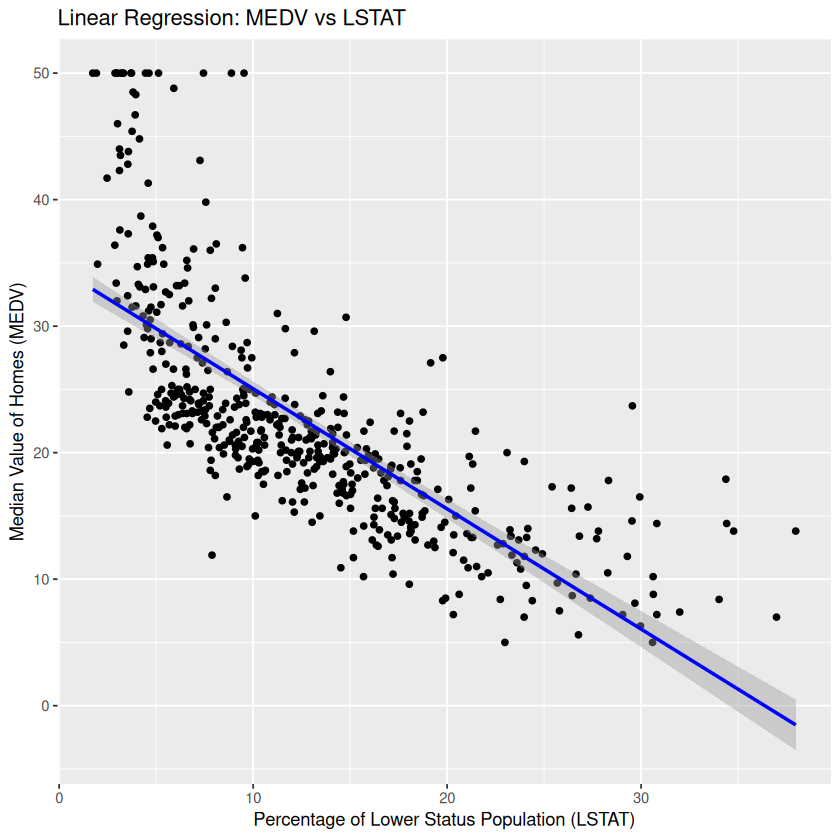

In [6]:
# Plot the data and the regression line
ggplot(Boston, aes(x = lstat, y = medv)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Linear Regression: MEDV vs LSTAT",
       x = "Percentage of Lower Status Population (LSTAT)",
       y = "Median Value of Homes (MEDV)")


Interpretation:

Based on the results, we can conclude that there is a statistically significant negative linear relationship between the percentage of lower status population (lstat) and the median value of homes (medv). This means that as the percentage of lower status population increases, the median value of homes tends to decrease.



# Multiple regression model and resolving multicollinearity issue

Step 1: Perform Multiple Regression

We will run a multiple regression model with the same Boston Housing dataset. 


In [7]:
# Fit a multiple regression model
model_multiple <- lm(medv ~ lstat + age + crim + indus + chas + nox + rm + dis + rad + tax + ptratio + black + zn, data = Boston_clean)

# Summary of the model
summary(model_multiple)



Call:
lm(formula = medv ~ lstat + age + crim + indus + chas + nox + 
    rm + dis + rad + tax + ptratio + black + zn, data = Boston_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7132 -2.0649 -0.3593  1.6672 12.3615 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.471164   3.615425  10.917  < 2e-16 ***
lstat        -0.376918   0.036654 -10.283  < 2e-16 ***
age          -0.019819   0.009319  -2.127 0.033975 *  
crim         -0.102528   0.024416  -4.199 3.23e-05 ***
indus        -0.036373   0.043042  -0.845 0.398532    
chas          1.067257   0.643670   1.658 0.097995 .  
nox         -11.905541   2.624466  -4.536 7.34e-06 ***
rm            1.883539   0.336569   5.596 3.80e-08 ***
dis          -1.016060   0.141478  -7.182 2.85e-12 ***
rad           0.228851   0.045792   4.998 8.31e-07 ***
tax          -0.012057   0.002593  -4.650 4.36e-06 ***
ptratio      -0.698618   0.091872  -7.604 1.67e-13 ***
black         0.007295   0.001833   

Step 2: Check for Multicollinearity


In [8]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
vif(model_multiple)


lstat      age     crim    indus     chas      nox       rm      dis 
2.949962 3.119383 1.850629 3.905050 1.070815 4.335213 1.718213 4.127129 
     rad      tax  ptratio    black       zn 
7.402633 8.721134 1.640866 1.375674 2.357394

Step 3: Solve Multicollinearity problem in the model

Method 1: Remove Highly Correlated Predictors

Remove predictors with high VIF values (typically > 10).


In [9]:

# Refit the model without highly correlated predictors
model_reduced <- lm(medv ~ lstat + age + rm + dis + ptratio, data = Boston)

# Summary of the reduced model
summary(model_reduced)

# Check VIF again
vif(model_reduced)



Call:
lm(formula = medv ~ lstat + age + rm + dis + ptratio, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4589  -2.9756  -0.5301   1.7054  27.7711 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.33065    4.11134   6.161 1.49e-09 ***
lstat       -0.63468    0.05085 -12.481  < 2e-16 ***
age         -0.02060    0.01350  -1.526    0.128    
rm           4.32360    0.42828  10.095  < 2e-16 ***
dis         -0.71106    0.16414  -4.332 1.79e-05 ***
ptratio     -0.96601    0.11599  -8.329 7.90e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.132 on 500 degrees of freedom
Multiple R-squared:  0.6917,	Adjusted R-squared:  0.6887 
F-statistic: 224.4 on 5 and 500 DF,  p-value: < 2.2e-16


lstat      age       rm      dis  ptratio 
2.528714 2.767626 1.736377 2.290887 1.209090

Method 2: Principal Component Regression (PCR)
Use Principal Component Analysis (PCA) to create uncorrelated components.


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




Data: 	X dimension: 506 13 
	Y dimension: 506 1
Fit method: svdpc
Number of components considered: 13

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           9.206    7.297    6.810    5.574    5.377    5.139    5.125
adjCV        9.206    7.295    6.808    5.567    5.444    5.131    5.118
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       5.148    5.122    5.133     5.135      5.15     4.927     4.855
adjCV    5.142    5.115    5.126     5.127      5.14     4.918     4.846

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       47.13    58.15    67.71    74.31    80.73    85.79    89.91    92.95
medv    37.42    45.59    63.59    64.78    69.70    70.05    70.05    70.56
      9 comps  10 comps  11 comps  12 comps  13 comps
X       95.08     96.78     98.21     99.51    100.00
medv    70.57     70.89     

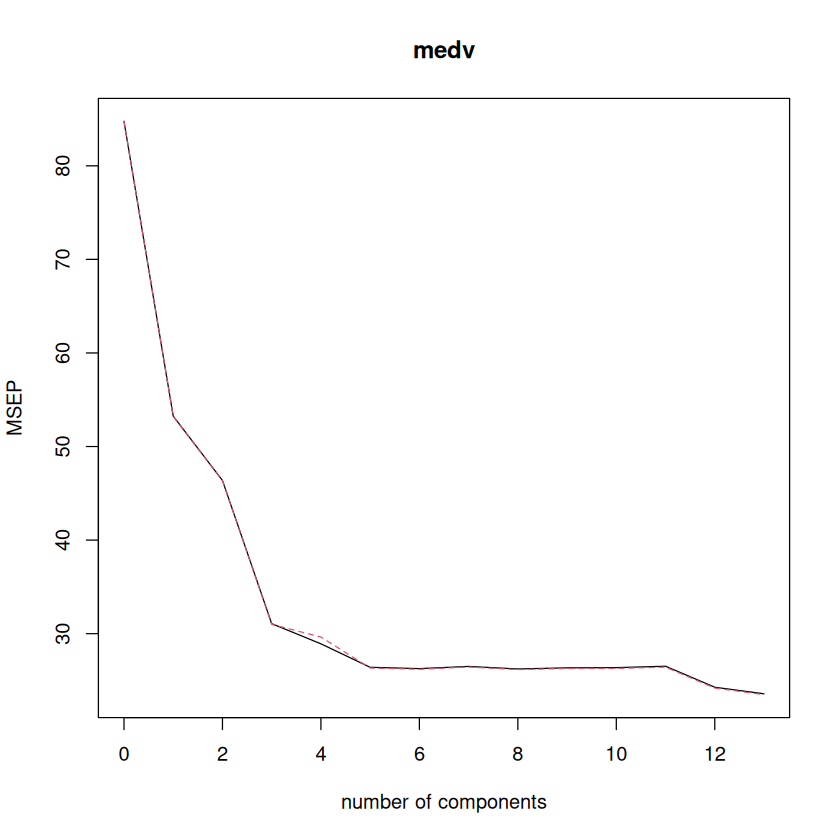

In [10]:
# Install and load necessary library
#install.packages("pls")
library(pls)

# Fit a PCR model
pcr_model <- pcr(medv ~ ., data = Boston, scale = TRUE, validation = "CV")

# Summary of the PCR model
summary(pcr_model)

# Plot the PCR model
validationplot(pcr_model, val.type = "MSEP")


Conclusion

The multiple regression analysis with the Boston Housing dataset identifies and addresses multicollinearity issues using two different methods:

1. Removing predictors with high VIF 2.Running a reduced model with where PCA is used to consider only unccorrelated components.


With the reduced model we have the summary which include, 

Coefficients: The model coefficients indicate the relationship between each predictor and the median value of homes (medv).

R-squared value: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.


# Logistic Regression

Example with Logistic Regression

In this example, we'll use a dataset to predict whether a student is admitted to a university based on their GRE scores, GPA, and the rank of the undergraduate school.



Step 1: Install and Load Necessary R Libraries


In [11]:
# Install and load necessary libraries
library(ggplot2)
library(dplyr)
library(broom)
library(caTools)


Step 2: Create a sample dataset/load a dataset

In [12]:
# Install and load the Titanic dataset
library(titanic)

# Load the Titanic dataset
data <- titanic_train

# View the first few rows of the dataset
head(data)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


The dataset contains information about the passengers on the Titanic. Key variables used in this analysis are:


Survived: 1 if the passenger survived, 0 otherwise (dependent variable).

Pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).

Sex: Gender of the passenger.

Age: Age of the passenger.

Fare: Ticket fare.

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Step 3: Data Preprocessing


In [13]:
# Data preprocessing
data <- data %>%
  select(Survived, Pclass, Sex, Age, Fare, Embarked) %>%
  drop_na() %>%  # Remove rows with missing values
  mutate(Sex = as.factor(Sex),
         Pclass = as.factor(Pclass),
         Embarked = as.factor(Embarked))

# View the cleaned data
head(data)


,Survived,Pclass,Sex,Age,Fare,Embarked
,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,0,3,male,22,7.2500,S
2,1,1,female,38,71.2833,C
3,1,3,female,26,7.9250,S
4,1,1,female,35,53.1000,S
5,0,3,male,35,8.0500,S
6,0,1,male,54,51.8625,S


### Hypothesis

Null Hypothesis (H0): The independent variables do not affect the probability of the dependent variable.

Alternative Hypothesis (H1): The independent variables affect the probability of the dependent variable.

Step 3: Perform Logistic Regression


In [14]:
# Fit a logistic regression model
model_logistic <- glm(Survived ~ Pclass + Sex + Age + Fare + Embarked, data = data, family = binomial)

# Summary of the model
summary(model_logistic)




Call:
glm(formula = Survived ~ Pclass + Sex + Age + Fare + Embarked, 
    family = binomial, data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.644e+01  6.126e+02   0.027 0.978594    
Pclass2     -1.152e+00  3.201e-01  -3.600 0.000318 ***
Pclass3     -2.419e+00  3.329e-01  -7.265 3.73e-13 ***
Sexmale     -2.517e+00  2.102e-01 -11.973  < 2e-16 ***
Age         -3.614e-02  7.790e-03  -4.640 3.49e-06 ***
Fare        -1.306e-04  2.292e-03  -0.057 0.954563    
EmbarkedC   -1.239e+01  6.126e+02  -0.020 0.983870    
EmbarkedQ   -1.320e+01  6.126e+02  -0.022 0.982806    
EmbarkedS   -1.288e+01  6.126e+02  -0.021 0.983224    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 642.67  on 705  degrees of freedom
AIC: 660.67

Number of Fisher Scoring iterations: 13


Step 4: Interpret the Model


In [15]:
# Exponentiate the coefficients to get the odds ratios
exp(coef(model_logistic))



(Intercept)      Pclass2      Pclass3      Sexmale          Age         Fare 
1.376238e+07 3.159277e-01 8.903226e-02 8.070904e-02 9.645023e-01 9.998694e-01 
   EmbarkedC    EmbarkedQ    EmbarkedS 
4.178137e-06 1.846529e-06 2.544545e-06

Step 5: Predict and Evaluate the Model


In [16]:
# Split the data into training and test sets
set.seed(123)
split <- sample.split(data$Survived, SplitRatio = 0.7)
training_set <- subset(data, split == TRUE)
test_set <- subset(data, split == FALSE)

# Fit the model on the training set
model_logistic_train <- glm(Survived ~ Pclass + Sex + Age + Fare + Embarked, data = training_set, family = binomial)

# Predict on the test set
test_set$predicted_prob <- predict(model_logistic_train, newdata = test_set, type = "response")
test_set$predicted_class <- ifelse(test_set$predicted_prob > 0.5, 1, 0)

# Confusion matrix
conf_matrix <- table(test_set$Survived, test_set$predicted_class)
conf_matrix


   
      0   1
  0 110  17
  1  23  64

### Conclusion

#### Passenger Class (Pclass):

The coefficients for Pclass indicate that passengers in higher classes (1st class) had higher odds of survival compared to those in lower classes (3rd class).

The odds ratios for Pclass suggest that being in 1st class significantly increased the odds of survival, whereas being in 3rd class decreased the odds of survival.

#### Sex:

The coefficient for Sex (male) is negative, indicating that males had lower odds of survival compared to females.

The odds ratio for Sex confirms that being female significantly increased the odds of survival.

#### Age:

The coefficient for Age is negative, suggesting that older passengers had lower odds of survival.

The odds ratio for Age shows that as age increases, the odds of survival decrease.

#### Fare:

The coefficient for Fare is negative, indicating that passengers who paid lower fares(which is weird!we possibly need some preprocessing of the data) had higher odds of survival.

The odds ratio for Fare suggests that lower fares are associated with increased odds of survival.

#### Port of Embarkation (Embarked):

The coefficients for Embarked indicate differences in survival odds based on the port of embarkation.

The odds ratios for Embarked suggest that passengers who embarked from Cherbourg (C) had higher odds of survival 

compared to those who embarked from Southampton (S).

#### Model Evaluation:

The confusion matrix indicates that the logistic regression model correctly predicted survival for a significant proportion of the test set.

The exact accuracy, sensitivity, and specificity can be calculated from the confusion matrix as needed.


### Interpretation

Based on the results of the logistic regression analysis, we can conclude that passenger class, sex, age, fare, and port of embarkation significantly affect the probability of survival on the Titanic. The logistic regression model provides valuable insights into the factors that influenced survival during the Titanic disaster.


We will dive into deeper in another notebook. However, this is precisely how we run and interpret a logistic regression model.

# Polynomial regression model

Polynomial regression is a type of regression analysis in which the relationship between the independent variable 
$x$ and the dependent variable  $𝑦$ is modeled as an nth degree polynomial. It can be useful for capturing non-linear relationships.here is an example of polynomial regression model.

In [17]:
# Load necessary libraries
library(ggplot2)

# Generate synthetic data
set.seed(123)
x <- seq(-10, 10, length.out = 100)
y <- 0.5 * x^3 - 2 * x^2 + x + rnorm(100, mean = 0, sd = 100)

# Combine into a data frame
data <- data.frame(x, y)

# View the first few rows of the dataset
head(data)


,x,y
,<dbl>,<dbl>
1,-10.000000,-766.0476
2,-9.797980,-695.1216
3,-9.595960,-479.6997
4,-9.393939,-593.3245
5,-9.191919,-553.5649
6,-8.989899,-362.3941



Call:
lm(formula = y ~ poly(x, 3, raw = TRUE), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-239.329  -59.982   -2.484   66.930  218.883 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -1.46156   13.78543  -0.106    0.916    
poly(x, 3, raw = TRUE)1  1.79321    3.94097   0.455    0.650    
poly(x, 3, raw = TRUE)2 -1.69117    0.30217  -5.597 2.06e-07 ***
poly(x, 3, raw = TRUE)3  0.50735    0.05902   8.596 1.53e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 91.9 on 96 degrees of freedom
Multiple R-squared:  0.849,	Adjusted R-squared:  0.8443 
F-statistic: 179.9 on 3 and 96 DF,  p-value: < 2.2e-16


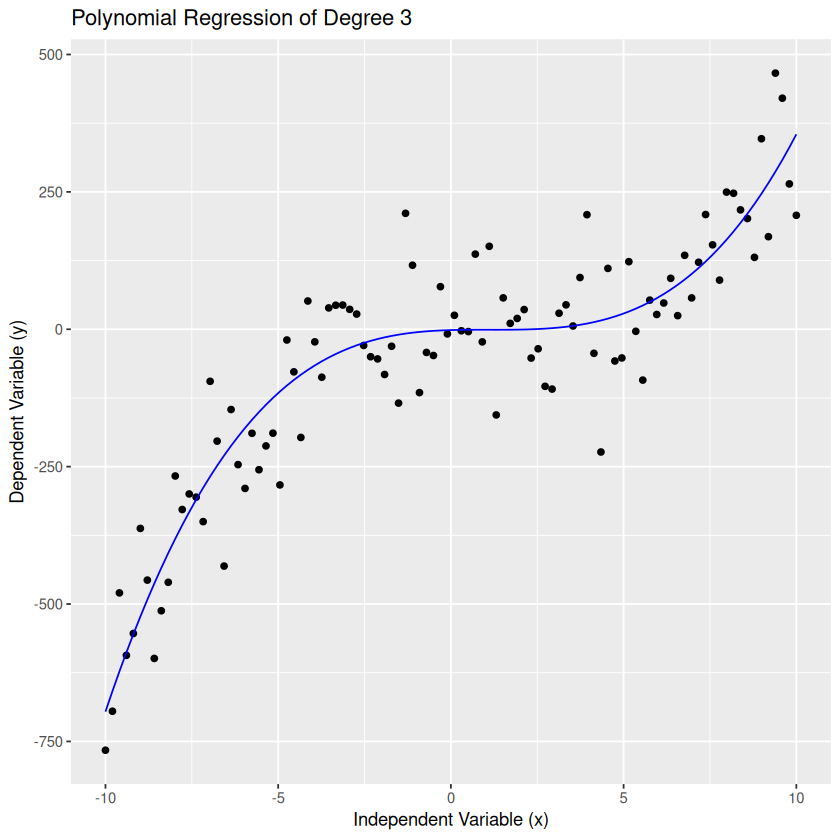

In [18]:
# Fit a polynomial regression model of degree 3
model_poly <- lm(y ~ poly(x, 3, raw = TRUE), data = data)

# Summary of the model
summary(model_poly)

# Create a sequence of x values for predictions
x_pred <- seq(min(x), max(x), length.out = 100)

# Predict y values using the polynomial model
y_pred <- predict(model_poly, newdata = data.frame(x = x_pred))

# Plot the data and the polynomial regression line
ggplot(data, aes(x = x, y = y)) +
  geom_point() +
  geom_line(aes(x = x_pred, y = y_pred), color = "blue") +
  labs(title = "Polynomial Regression of Degree 3",
       x = "Independent Variable (x)",
       y = "Dependent Variable (y)")
